# Customer Personality Analysis and Clustering


Note: This python notebook is for cleaning , preprocessing and model building. The analysis will be shown in the Tableau file


## Study about the dataset


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("marketing_campaign.csv",sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<b> Data Exploration:


ID: Customer's unique identifier <br> <br>
Year_Birth: Customer's birth year<br> <br>
Education: Customer's education level<br> <br>
Marital_Status: Customer's marital status<br> <br>
Income: Customer's yearly household income<br> <br>
Kidhome: Number of children in customer's household<br> <br>
Teenhome: Number of teenagers in customer's household<br> <br>
Dt_Customer: Date of customer's enrollment with the company<br> <br>
Recency: Number of days since customer's last purchase<br> <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br> <br>


MntWines: Amount spent on wine in last 2 years<br> <br>
MntFruits: Amount spent on fruits in last 2 years<br> <br>
MntMeatProducts: Amount spent on meat in last 2 years<br> <br>
MntFishProducts: Amount spent on fish in last 2 years<br> <br>
MntSweetProducts: Amount spent on sweets in last 2 years<br> <br>
MntGoldProds: Amount spent on gold in last 2 years<br> <br>


NumDealsPurchases: Number of purchases made with a discount<br> <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br> <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br> <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br> <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br> <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br> <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br> <br>


NumWebPurchases: Number of purchases made through the company’s website<br> <br>
NumCatalogPurchases: Number of purchases made using a catalogue<br> <br>
NumStorePurchases: Number of purchases made directly in stores<br> <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month<br> <br>


<b>Target </b> <br>
Need to perform clustering to summarize customer segments.


Check null value


In [89]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [90]:
df = df.dropna()

In [91]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\2366133735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [93]:
df.select_dtypes(include=["object"]).columns

Index(['Education', 'Marital_Status'], dtype='object')

In [94]:
for x in df.select_dtypes(include=["object"]).columns:
    print(df[x].value_counts())
    print()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



## Preprocessing


Let's make some analysis:


First, there is no Age column, and the Birth date of customer doesn't work well, so we will extract Age from Year_Birth


In [95]:
import datetime
df["Age"] = datetime.date.today().year - df["Year_Birth"]

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\4160370800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = today = datetime.date.today().year - df["Year_Birth"]


Next is education. <br>
Currently, there are 5 types of education. But, we there are some similar in these education: <br>
<b> Graduation: Graduation <br>
PhD: PostGraduated <br>
Master: PostGraduated <br>
2n Cycle: UnderGraduated <br>
Basic: UnderGraduated


In [96]:
df["Education"] = df["Education"].replace({"PhD": "PostGraduated","Master": "PostGraduated", "2n Cycle":"UnderGraduate", "Basic": "UnderGraduate"})

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\1225973104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education"] = df["Education"].replace({"PhD": "PostGraduated","Master": "PostGraduated", "2n Cycle":"UnderGraduate", "Basic": "UnderGraduate"})


The marital status is a little complicated, let's make it more simple <br> <br>
There will be <b>Alone</b> if the customers are Widow, alone, divorced, single, absurd or Yolo <br> <br>
And <b>Together</b> if the customers are Together or Married


In [97]:
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Together", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\1522510484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Together", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


Kidhome and Teenhome could be merge into 1 column and from that, we will know the size of these customers family:


In [99]:
df["FamilySize"] = df["Marital_Status"].replace({"Alone": 1,"Together":2}) + df["Kidhome"] + df["Teenhome"]

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\3626992500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FamilySize"] = df["Marital_Status"].replace({"Alone": 1,"Together":2}) + df["Kidhome"] + df["Teenhome"]


In [101]:
df[["FamilySize","Marital_Status","Kidhome","Teenhome"]]

,FamilySize,Marital_Status,Kidhome,Teenhome
0,1,Alone,0,0
1,3,Alone,1,1
2,2,Together,0,0
3,3,Together,1,0
4,3,Together,1,0
...,...,...,...,...
2235,3,Together,0,1
2236,5,Together,2,1
2237,1,Alone,0,0
2238,3,Together,0,1


Finally, we can change Dt_Customer into number of year that customers enrolled with company


In [104]:
df["Enrolled"] = datetime.date.today().year - df["Dt_Customer"].dt.year

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\2302863231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enrolled"] = datetime.date.today().year - df["Dt_Customer"].dt.year


That's all for customer personal information. <br> <br>
Next is about customer' behaviour


Let's calculate the total ammount of money that customers spent.


In [106]:
df["Total"] = df["MntSweetProducts"] + df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntWines"]

C:\Users\Tri\AppData\Local\Temp\ipykernel_17400\2608783458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total"] = df["MntSweetProducts"] + df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntWines"]


Then, drop all the unuse column:


In [108]:
df = df.drop(["Dt_Customer", "Year_Birth", "Kidhome", "Teenhome", "ID"], axis=1)

Text(0.5, 1.0, 'Correlation plot Between Features')

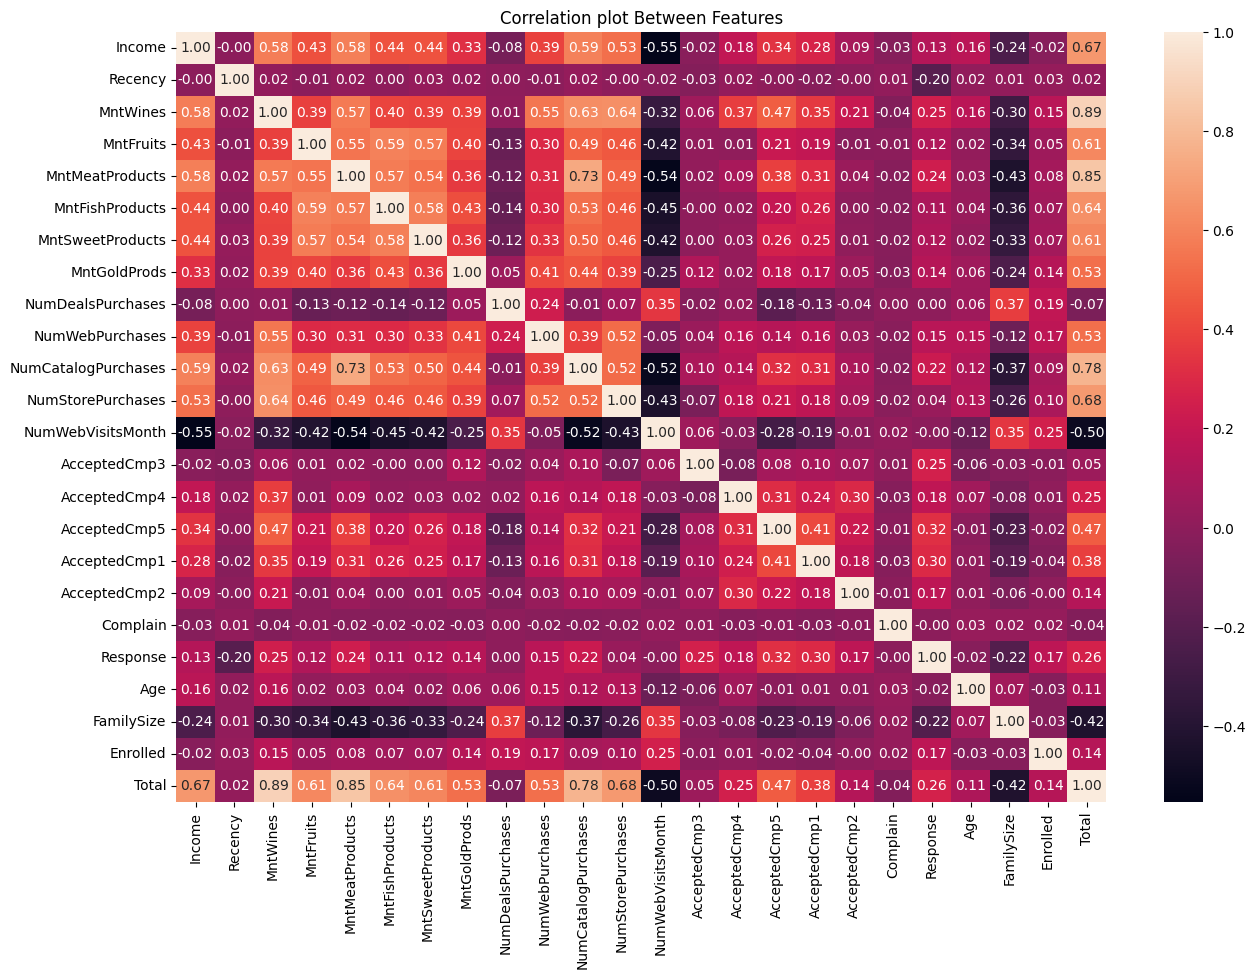

In [117]:
corr = df[['Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response',
       'Age', 'FamilySize', 'Enrolled', 'Total']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title("Correlation plot Between Features")

This is quite clean, so we will export it for visualization dashboard


In [118]:
# df.to_csv("clean.csv")

## Modeling


First, using Elbow method to find out how many clusters should we have.
